# 3. Trajectory planning 

__Note__ : In this Notebook we use the materials developed previously (geometry, kinematics) to implement a trajectory planner, so __make sure you understand the previous materials before starting this one__. 

We've seen how geometric and kinematic modeling relate mathematically motions in the joint space and motions in the task space. The direct problem always yields a unique solution, that is for given joint coordinates there is only one end-effector outcome. But the inverse problem is somehow more tricky, as there may be several joint configurations describing the same end-effector pose (e.g. redundant robot), or worse, it can happen that no solution is defined at all. In this Notebook, we will use the geometric and kinematic models of the 1R and 2R robots derived previously in order to plan trajectories. The trajectory planner will be python class taking a desired end-effector trajectory $(p_0,\dot{p}_0),...,(p_n,\dot{p}_n)$ as an input and returning the corresponding joint trajectory $(q_0,\dot{q}_0),...,(q_n,\dot{q}_n)$. 

First we import the necessary modules 

In [1]:
## Author: Sebastien
## Date : 22/06/2020

# Import required packages for this notebook
import numpy as np
from matplotlib import pyplot as plt
import IPython
from IPython.display import Image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

np.set_printoptions(precision=4)

# models.py contains the same classes we defined in the Notebooks
%run kinematics-solution.ipynb
%run geometry-solution.ipynb
# from models import GeometricModel1R, KinematicModel1R, GeometricModel2R, KinematicModel2R

Exception: File `'kinematics-solution.ipynb.py'` not found.

It is convenient to gather the geometric and kinematic models within the same class :

In [2]:
class Model1R:
    '''
    Environment class for the 1R robot kinematics + geometry
    '''
    def __init__(self, L=1.):
        ''' 
        Initialize model parameters
        '''
        # Number of joints
        self.nq = 1
        
        # Geometric Model
        self.geometry = GeometricModel1R(L)
        # Kinematic Model
        self.kinematics = KinematicModel1R(L)
        
    def animate(self, q):
        '''
        Animate a given sequence of joint positions
        '''
        self.geometry.animate(q[0, :])

The `KinematicPlanner` class is initialized with a robot model (such as `Model1R`). The member function `plan` takes a desired end-effector trajectory $(p_0,\dot{p}_0),...,(p_n,\dot{p}_n)$ as an input and computes the corresponding joint space trajectory $(q_0,\dot{q}_0),...,(q_n,\dot{q}_n)$.

__Question__ : Complete the code of the function `plan` below. 

Hint: use member functions of `Model1R.geometry` and `Model1R.kinematics`...

__Answer__ :

In [3]:
# Calculate desired joint trajectory
class KinematicPlanner:
    
    def __init__(self, model=None):
        '''
        Initialize parameters
        '''
        # Model (geometry + kinematics) 
        self.model = model
        # Number of joints
        self.nq = self.model.nq

    def plan(self, p, pdot):
        '''
        Calculates the desired joint trajectory achieving an input end-effector motion
        Input : end-effector positions, velocities
        Output : joint positions, velocities
        '''
        pass

Next we show how to use the planner. We first need to define the desired end-effector trajectory (positions and velocities).

Text(0, 0.5, 'y_p (m)')

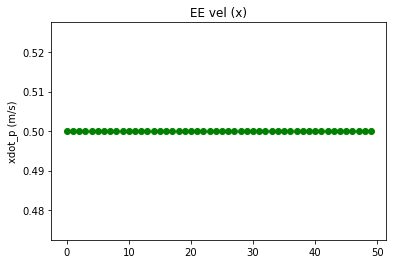

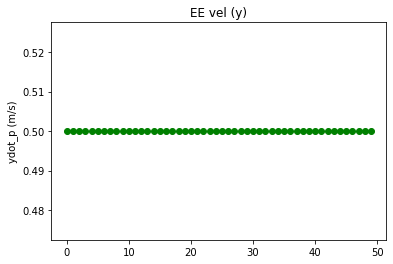

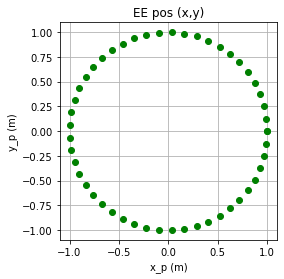

In [4]:
# Number of points
N = 50
# Desired end-effector positions p1,...,pN = circle 
x_p = np.cos(np.linspace(0,1,N)*2*np.pi)
y_p = np.sin(np.linspace(0,1,N)*2*np.pi)
p = np.array([x_p, y_p])
# Desired end-effector velocities pdot1,...,pdotN = constant v
v = .5
pdot = v*np.array([np.ones(N)]*2)

# Plot desired end-effector trajectory
    # xdot
plt.figure()
plt.plot(pdot[0,:], 'go')
plt.title("EE vel (x)")
plt.ylabel("xdot_p (m/s)")
    # ydot
plt.figure()
plt.plot(pdot[1,:], 'go')
plt.title("EE vel (y)")
plt.ylabel("ydot_p (m/s)")
    # p = (x,y)
plt.figure()
plt.plot(p[0,:], p[1,:], 'go')
plt.gca().set_aspect('equal')
plt.grid()
plt.title("EE pos (x,y)")
plt.xlabel("x_p (m)")
plt.ylabel("y_p (m)")

Now the `KinematicPlanner` class can be used to calculate the corresponding joint space trajectory (joint positions and velocities). 

In [5]:
# Create a full model (geometry + kinematics)
model1R = Model1R()


# Create kinematic planner
planner1 = KinematicPlanner(model1R)


# Plan
q, qdot = planner1.plan(p, pdot)


# Animate 
model1R.animate(q)


# Plot the joint trajectories
plt.figure()
plt.plot(q[0,:], 'bo')
plt.title("joint position")
plt.ylabel("q (rad)")
    # qdot
plt.figure()
plt.plot(qdot[0,:], 'bo')
plt.title("joint velocity")
plt.ylabel("qdot (rad/s)")

NameError: name 'GeometricModel1R' is not defined

__Question__ : Implement the `Model2R` based on the `Model1R` example (you can complete the code below). Test your implementation by generating a trajectory using the trajectory planner.

__Answer__ : 

In [6]:
class Model2R:
    '''
    Environment class for the 2R robot kinematics + geometry
    '''
    def __init__(self, L1=1., L2=1.):
        ''' 
        Initialize model parameters
        '''
        pass
        
    def animate(self, q):
        '''
        Animate a given sequence of joint positions
        '''
        pass

Now we calculate the joint trajectory using the planner (for the same desired end-effector trajectory as before) + animation and plots.

In [7]:
# Create a full model (geometry + kinematics) of the 2R robot
model2R = Model2R()
# Create planner
planner2 = KinematicPlanner(model2R)
# Plan
q, qdot = planner2.plan(p, pdot)
# Animate
model2R.animate(q)
# Plot the joint trajectories
    # q
plt.figure()
plt.plot(q[0,:], 'bo', label='q1')
plt.title("joint positions")
plt.ylabel("q (rad)")
plt.plot(q[1,:], 'ro', label='q2')
plt.legend()
    # qdot
plt.figure()
plt.plot(qdot[0,:], 'bo', label='q1')
plt.title("joint positions")
plt.ylabel("q (rad)")
plt.plot(qdot[1,:], 'ro', label='q2')
plt.legend()

AttributeError: 'Model2R' object has no attribute 'nq'

Congratulations ! You completed the geometry and kinematics part. The next Notebook will introduce the dynamic model. While the kinematic model describes motions in terms of velocities, it doesn't involve what _causes_ of those motions. The dynamic model completes the picture by including mechanical efforts applied on the robot. More specifically, it relates forces and torques in the actuators to joint space motions.